Iniciando a exploração de dados

Starting Data Exploring

In [1]:
# Começando a ler o arquivo da versão WEB  / Reading the file on WEB
# na_values = 'na' são os dados faltantes / NA Values are the missing data
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values = 'na')

In [2]:
# Exibe o cabeçalho / Displays the head
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [3]:
# Estrutura do arquivo / File Structure
df.shape # retorna uma tupla (qtd linhas e qtd colunas) / returns a tuple (rows & columns)

(10127, 16)

In [4]:
df[df['default'] == 0].shape

(8500, 16)

In [5]:
df[df['default'] == 1].shape

(1627, 16)

In [6]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [7]:
print(f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print(f'A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


In [8]:
# Schema

df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [9]:
# Colunas e seus tipos de dados / Columns and datatypes

df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [10]:
# Atributos categóricos / Categoric Atributes

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [11]:
# Atributos numéricos / Numeric Atributes

df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Dados faltantes:

Dados faltantes podem ser:
* Vazios ("")
* Nulos (None)
* Não disponíveis ou aplicáveis (na, NA, etc.);
* Não numérico (nan, NaN, NAN, etc).

Missing data can be:
* empty ("")
* Null (None)
* Not Available or Applicable

In [12]:
# Trabalhando com dados faltantes / Working with the missing data
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [13]:
# Verificando quais colunas possuem dados faltantes. / Checking missing data in each column
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [14]:
# Exibe a qtd de dados faltantes somados por coluna / Displays the total of missing data sum by column
df.isna().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [15]:
# Função que levanta algumas estatísticas sobre as colunas dos dados faltantes.
# Function that raises statistics from the missing data in each column
def stats_dados_faltantes(df: pd.DataFrame) -> None:
  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _= df[df[col].isna()].shape
      total, _=df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd / total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)
  for stat in stats_dados_faltantes:
    print(stat)

In [16]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [17]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [18]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Data wrangling - correção do schema / Correctio of the schema

In [19]:
# as colunas limite_credito e valor_transacoes_12m estavam sendo interpretadas como colunas categoricas: object
# # the limite_credito and valor_transacoes_12m columns were interpreted as categorical columns: object
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [20]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [21]:
# criando função lambda para limpar dados, mas antes testando sua aplicação atraves do método funcional map.
# creating a lambda function to clear the data testing its aplication through the functional map method.
fn = lambda valor: float(valor.replace(".","").replace(",",".")if isinstance(valor, str) else valor)

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))
print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


In [22]:
# função lambda pronta. aplicando nas colunas de interesse
# Lambda function ready. applying in the wished columns.
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [23]:
print(df['valor_transacoes_12m'])
print(df['limite_credito'])

0         1144.90
1         1291.45
2         1887.72
3         1171.56
4          816.08
           ...   
10122    15476.26
10123     8764.88
10124    10291.78
10125     8395.62
10126    10294.96
Name: valor_transacoes_12m, Length: 10127, dtype: float64
0        12691.51
1         8256.96
2         3418.56
3         3313.03
4         4716.22
           ...   
10122     4003.91
10123     4277.04
10124     5409.16
10125     5281.84
10126    10388.80
Name: limite_credito, Length: 10127, dtype: float64


In [24]:
# Correção do Schema, transformação e limpeza dos dados.
# Schema correction, transforming and clearing the data.

df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [25]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


In [26]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [27]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [28]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [29]:
# Removendo dados faltantes
# Removing missing data

df.dropna(inplace=True)

In [30]:
# Analisando a estrutura dos dados sem os dados faltantes
# Analyzing the structure of the data updated with no missing data

df.shape

(7081, 16)

In [31]:
df[df['default'] == 0].shape

(5968, 16)

In [32]:
df[df['default'] == 1].shape

(1113, 16)

In [33]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [34]:
print(f'A proporção de adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total,2)}%')
print(f'A nova proporcao de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo,2)}%')
print("")
print(f'A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print(f'A nova proporção de clientes inadimplentes é de {round(100* qtd_inadimplentes_novo / qtd_total_novo,2)}%')

A proporção de adimplentes ativos é de 83.93%
A nova proporcao de clientes adimplentes é de 84.28%

A proporção de clientes inadimplentes é de 16.07%
A nova proporção de clientes inadimplentes é de 15.72%


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid") # cria um padrão de estilo de gráfico / creating graph pattern style

In [36]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

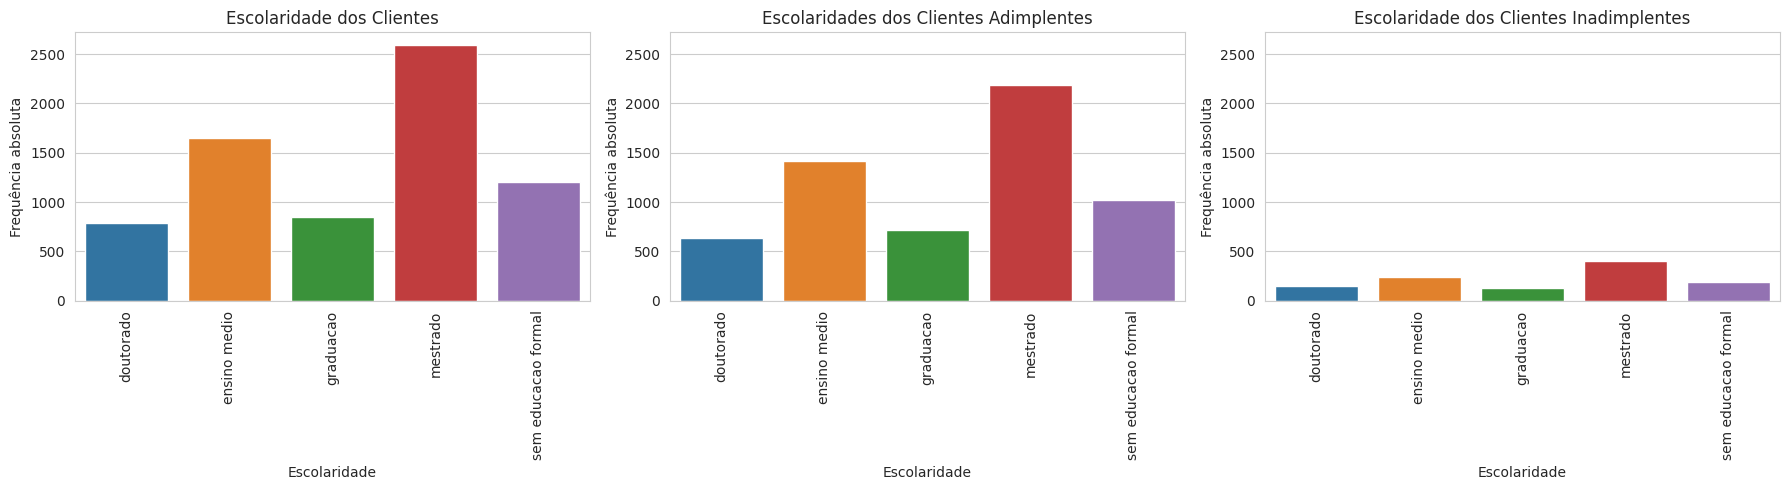

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando a relação entre a variavel resposta e a escolaridade
# Visualizing the relation among the default variable with scholarship

# Definindo as variáveis / Defining variables
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridades dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

# Criando as variáveis para armazenar a figura e os eixos da figura
# Creating the variable to store the figure and its axis.
figura, eixos = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Definindo o eixo inicial e o valor máximo de y
# Defining initial axis and max value of y
eixo = 0
max_y = 0

# Loop para percorrer os DataFrames e criar os gráficos
# Loop to run through the DataFrames and create the graphics
for dataframe in [df, df_adimplente, df_inadimplente]:
  df_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(drop=True, inplace=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  # Seaborn configura os plots
  # Seaborn set the plots
  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência absoluta')
  f.set_xticklabels(f.get_xticklabels(), rotation=90)

  # Atualiza o valor máximo de y para manter a escala consistente entre os gráficos
  # Update the max value of y to keep the scale consistent among other graphs
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

# Exibe a figura
# Displays the figure
plt.tight_layout()
figura.show()

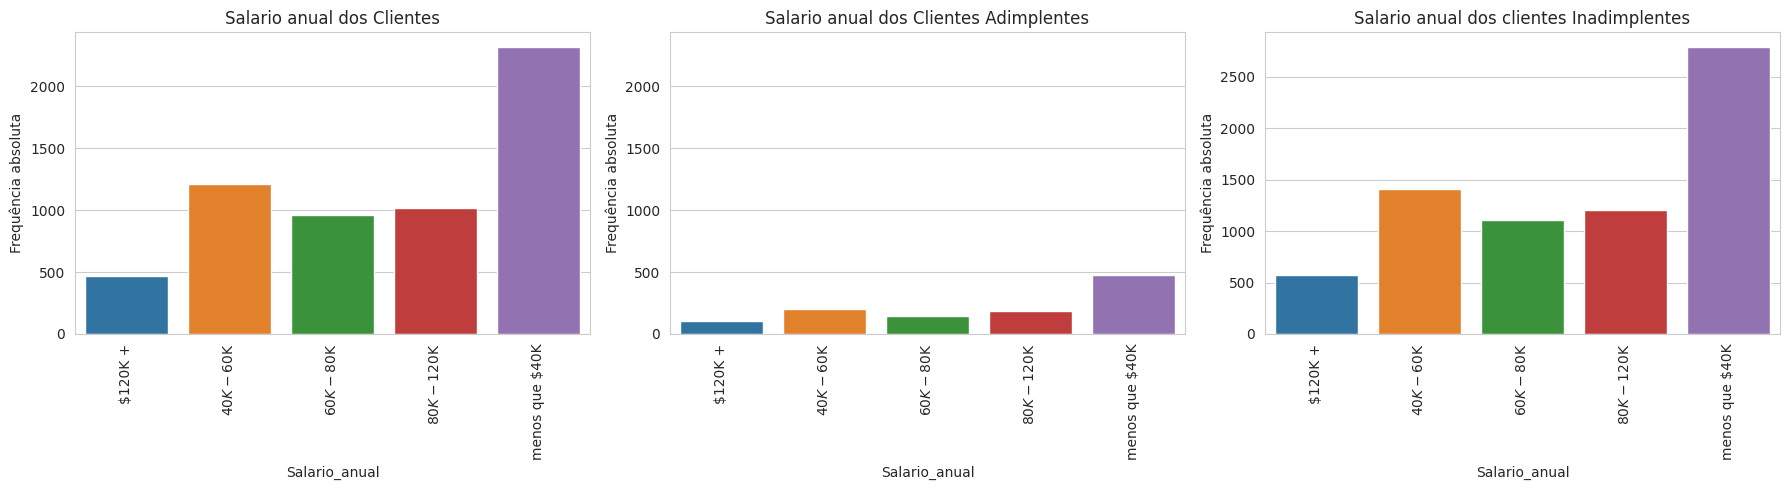

In [38]:
# Visualizando a relação entre variável resposta default com o salario anual
# Visualizing the relation among the default variable with anual salary

# Definindo as variáveis
# Deifining variables
coluna = 'salario_anual'
titulos = ['Salario anual dos Clientes', 'Salario anual dos Clientes Adimplentes','Salario anual dos clientes Inadimplentes']

# Definindo o eixo inicial e o valor máximo de y
# Defining the initial axis and max value of y
eixo = 0
max_y = 0

# Criando as variáveis para armazenar a figura e os eixos da figura
# Creating the variable to store the figure and its axis.

figura, eixos = plt.subplots(1,3, figsize=(18,5), sharex=True)

# Loop para percorrer os DataFrames e criar os gráficos
# Loop to run through the DataFrames and create the graphs
for dataframe in [df_adimplente, df_inadimplente, df]:
  df_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(drop=True, inplace=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  # Seaborn configura os plots
  # Seaborn set the plots
  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência absoluta')
  f.set_xticklabels(f.get_xticklabels(), rotation=90)

  # Atualiza o valor máximo de y para manter a escala consistente entre os gráficos
  # Update the max value of y to keep the scale consistent among other graphs
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

# Exibe a figura
# Displays the figure
plt.tight_layout()
figura.show()

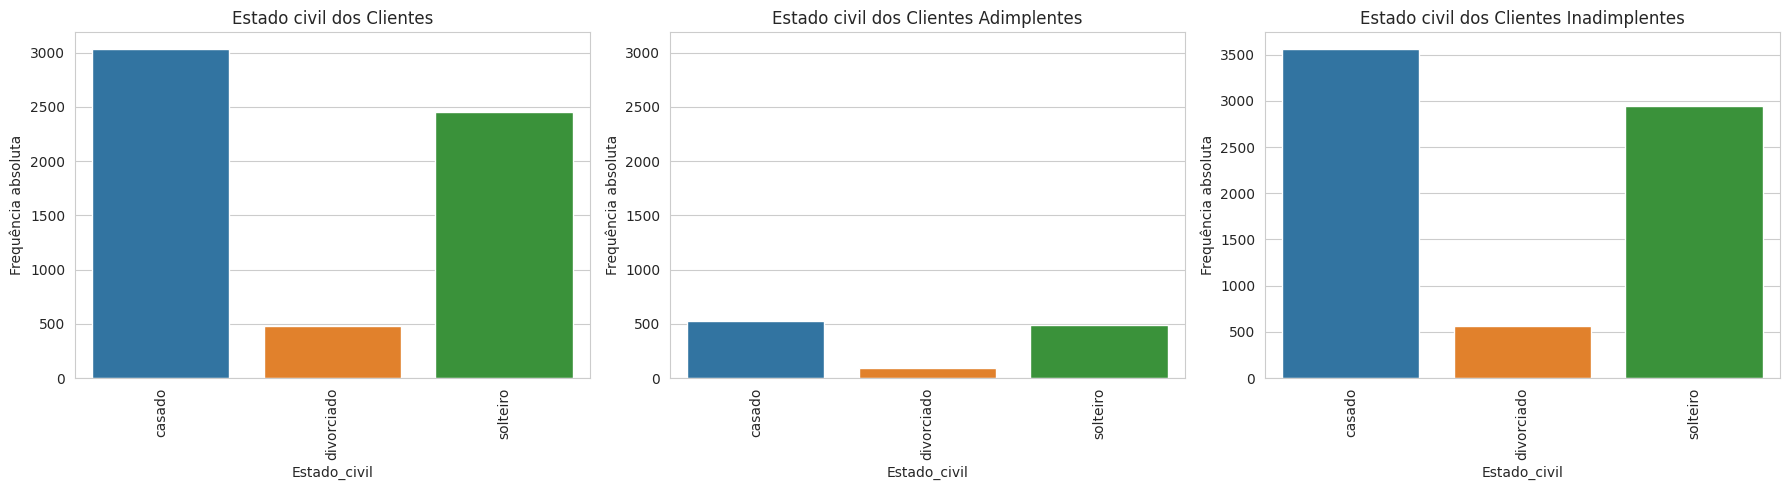

In [39]:
# Visualizando a relação entre variável resposta default com o Estado civil dos clientes**
# Visualizing the relationship between the default response variable and the marital status of clients**

# Definindo as variáveis
# Deifining variables
coluna = 'estado_civil'
titulos = ['Estado civil dos Clientes', 'Estado civil dos Clientes Adimplentes','Estado civil dos Clientes Inadimplentes']

# Definindo o eixo inicial e o valor máximo de y
# Defining the initial axis and max value of y
eixo = 0
max_y = 0

# Criando as variáveis para armazenar a figura e os eixos da figura
# Creating the variable to store the figure and its axis.
figura, eixos = plt.subplots(1,3, figsize=(18,5), sharex=True)

# Loop para percorrer os DataFrames e criar os gráficos
# Loop to run through the DataFrames and create the graphs
for dataframe in [df_adimplente, df_inadimplente, df]:
  df_to_plot = dataframe[coluna].value_counts().to_frame(name='frequencia_absoluta')
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(drop=True, inplace=True)
  df_to_plot.sort_values(by=[coluna], inplace=True)

  # Seaborn configura os plots
  # Seaborn set the plots
  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência absoluta')
  f.set_xticklabels(f.get_xticklabels(), rotation=90)

# Atualiza o valor máximo de y para manter a escala consistente entre os gráficos
# Update the max value of y to keep the scale consistent among other graphs
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

# Exibe a figura
# Displays the figure
plt.tight_layout()
figura.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


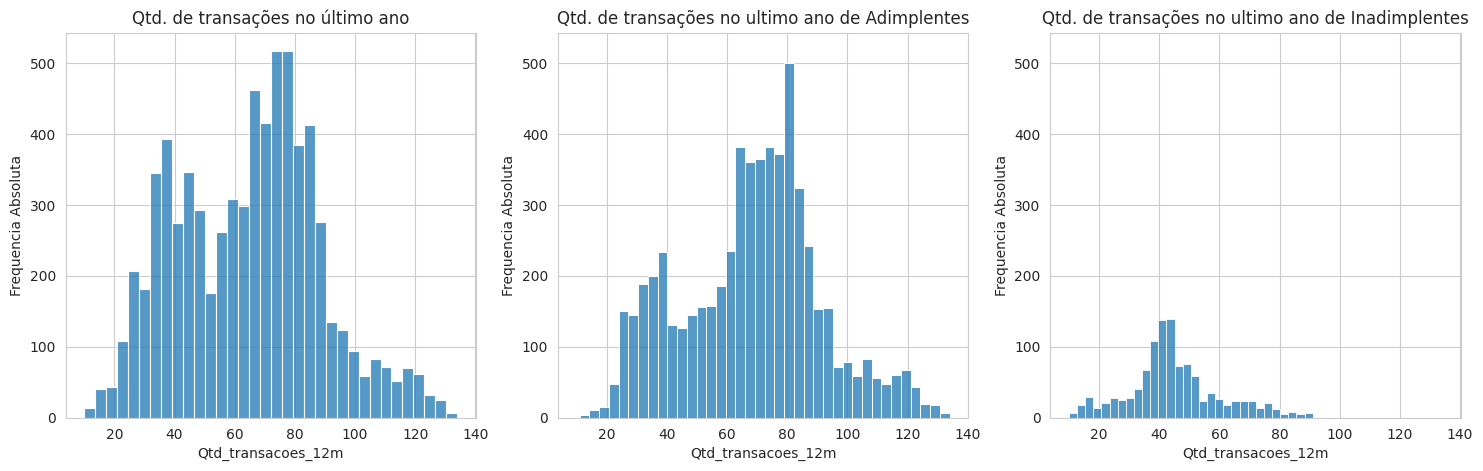

In [40]:
# Visualizando a relação entre a variavel resposta default com atributos numéricos.
# Visualizing the relationship between the default response variable and numeric attributes.


# Criando as variáveis para armazenar a figura e os eixos da figura
# Creating the variable to store the figure and its axis.

coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de transações no último ano', 'Qtd. de transações no ultimo ano de Adimplentes', 'Qtd. de transações no ultimo ano de Inadimplentes']
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(18,5), sharex=True)

# Loop para percorrer os DataFrames e criar os gráficos
# Loop to run through the DataFrames and create the graphs
for dataframe in [df, df_adimplente, df_inadimplente]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


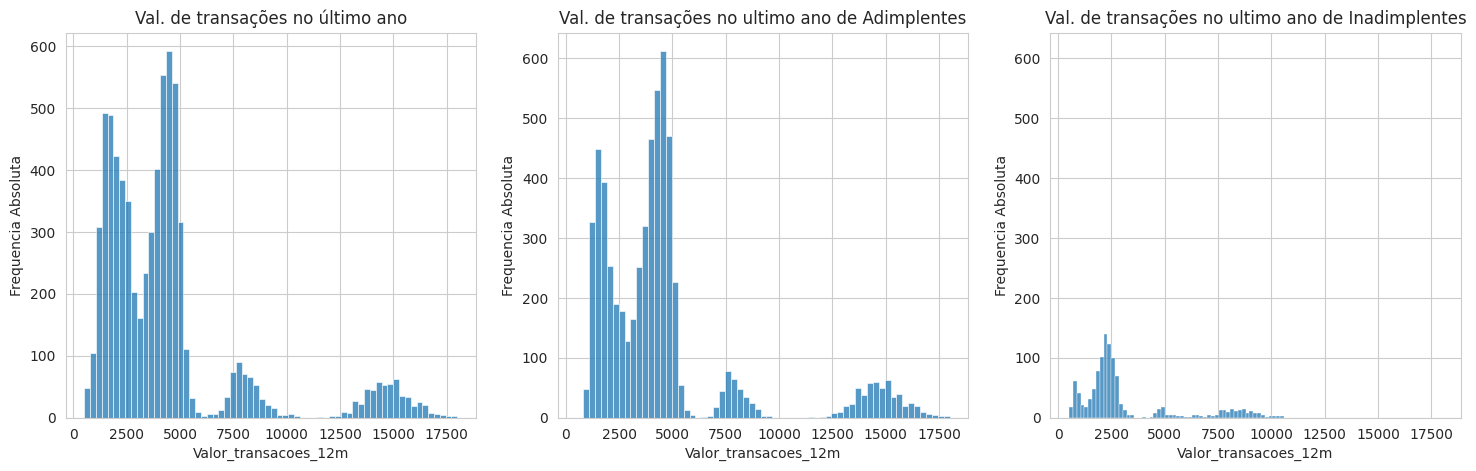

In [41]:
# Criando as variáveis para armazenar a figura e os eixos da figura
# Creating the variable to store the figure and its axis.
coluna = 'valor_transacoes_12m'
titulos = ['Val. de transações no último ano', 'Val. de transações no ultimo ano de Adimplentes', 'Val. de transações no ultimo ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(18,5), sharex=True)
# Loop para percorrer os DataFrames e criar os gráficos
# Loop to run through the DataFrames and create the graphs
for dataframe in [df, df_adimplente, df_inadimplente]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo]) # Seaborn configura os plots
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')

# Atualiza o valor máximo de y para manter a escala consistente entre os gráficos
# Update the max value of y to keep the scale consistent among other graphs
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

# Exibe a figura
# Displays the figure
figura.show()


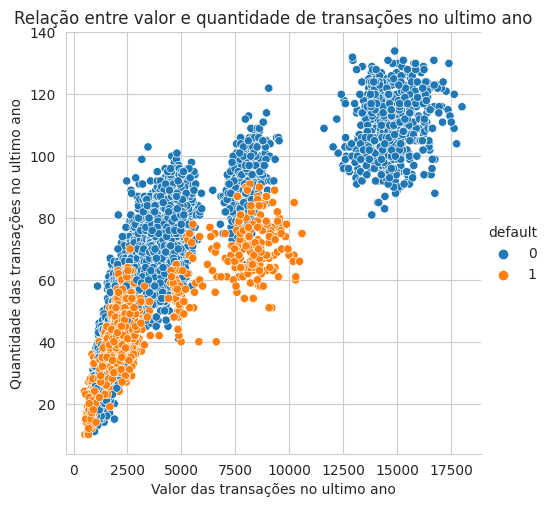

In [42]:
# Valor de transações nos ultimos 12 meses X quantidade de transações nos ultimos 12 meses.
# Value of transactions in the last 12 months X number of transactions in the last 12 months.0
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_= f.set(
    title='Relação entre valor e quantidade de transações no ultimo ano',
    xlabel='Valor das transações no ultimo ano',
    ylabel='Quantidade das transações no ultimo ano'
)